In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import pandas as pd
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# RAVDESS

In [2]:
# Define the path to your RAVDESS data
ravdess_path = "/kaggle/input/emotion-sound-data/archive/audio_speech_actors_01-24/"

# List all files in the directory
ravdess_files = [f for f in os.listdir(ravdess_path) if f.endswith('.wav')]

In [3]:
# Display the first few filenames
print(ravdess_files[:5])

[]


In [4]:
ravdess_directory_list = os.listdir(ravdess_path)

In [5]:
file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + dir + '/' + file)

In [6]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [7]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

In [8]:
# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/emotion-sound-data/archive/audio...
1,neutral,/kaggle/input/emotion-sound-data/archive/audio...
2,disgust,/kaggle/input/emotion-sound-data/archive/audio...
3,disgust,/kaggle/input/emotion-sound-data/archive/audio...
4,neutral,/kaggle/input/emotion-sound-data/archive/audio...


In [9]:
# Display the first few filenames
print(Ravdess_df[:8])

   Emotions                                               Path
0  surprise  /kaggle/input/emotion-sound-data/archive/audio...
1   neutral  /kaggle/input/emotion-sound-data/archive/audio...
2   disgust  /kaggle/input/emotion-sound-data/archive/audio...
3   disgust  /kaggle/input/emotion-sound-data/archive/audio...
4   neutral  /kaggle/input/emotion-sound-data/archive/audio...
5      fear  /kaggle/input/emotion-sound-data/archive/audio...
6       sad  /kaggle/input/emotion-sound-data/archive/audio...
7   neutral  /kaggle/input/emotion-sound-data/archive/audio...


# Crema DataFrame

In [10]:
cremad_path = "/kaggle/input/emotion-sound-data/sound2/AudioWAV/"
cremad_files = [f for f in os.listdir(cremad_path) if f.endswith('.wav')]
print(cremad_files[:5])


['1028_TSI_DIS_XX.wav', '1075_IEO_HAP_LO.wav', '1084_ITS_HAP_XX.wav', '1067_IWW_DIS_XX.wav', '1066_TIE_DIS_XX.wav']


In [11]:
crema_directory_list = os.listdir(cremad_path)

file_emotion = []
file_path = []

In [12]:
for file in crema_directory_list:
    # storing file paths
    file_path.append(cremad_path + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [13]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [14]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,/kaggle/input/emotion-sound-data/sound2/AudioW...
1,happy,/kaggle/input/emotion-sound-data/sound2/AudioW...
2,happy,/kaggle/input/emotion-sound-data/sound2/AudioW...
3,disgust,/kaggle/input/emotion-sound-data/sound2/AudioW...
4,disgust,/kaggle/input/emotion-sound-data/sound2/AudioW...


# TESS

In [15]:
tess_path = "/kaggle/input/emotion-sound-data/sound3/TESS Toronto emotional speech set data/"



In [16]:
tess_directory_list = os.listdir(tess_path)

file_emotion = []
file_path = []

In [17]:
tess_files = [f for f in os.listdir(tess_path) if f.endswith('.wav')]
print(tess_files[:5])

[]


In [18]:
for dir in tess_directory_list:
    directories = os.listdir(tess_path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(tess_path + dir + '/' + file)

In [19]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [20]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/kaggle/input/emotion-sound-data/sound3/TESS T...
1,fear,/kaggle/input/emotion-sound-data/sound3/TESS T...
2,fear,/kaggle/input/emotion-sound-data/sound3/TESS T...
3,fear,/kaggle/input/emotion-sound-data/sound3/TESS T...
4,fear,/kaggle/input/emotion-sound-data/sound3/TESS T...


# SAVEE

In [21]:
savee_path = "/kaggle/input/emotion-sound-data/sound4/ALL"
savee_files = [f for f in os.listdir(savee_path) if f.endswith('.wav')]
print(savee_files[:5])


['JE_h09.wav', 'KL_f12.wav', 'DC_h03.wav', 'DC_d04.wav', 'KL_a14.wav']


In [22]:
savee_directory_list = os.listdir(savee_path)

file_emotion = []
file_path = []

In [23]:
for file in savee_directory_list:
    file_path.append(savee_path + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

In [24]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

In [25]:
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,/kaggle/input/emotion-sound-data/sound4/ALLJE_...
1,fear,/kaggle/input/emotion-sound-data/sound4/ALLKL_...
2,happy,/kaggle/input/emotion-sound-data/sound4/ALLDC_...
3,disgust,/kaggle/input/emotion-sound-data/sound4/ALLDC_...
4,angry,/kaggle/input/emotion-sound-data/sound4/ALLKL_...


# chatgpt


In [39]:
import librosa
import numpy as np

def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled


In [42]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.4 MB/s eta 0:00:00a 0:00:01


In [45]:
!pip install numpy pandas librosa scikit-learn tensorflow keras resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [46]:
def load_data(file_list, base_path):
    features = []
    labels = []
    for file_name in file_list:
        file_path = os.path.join(base_path, file_name)
        mfccs = extract_features(file_path)
        features.append(mfccs)
        
        # Extract label from filename (example for RAVDESS)
        label = int(file_name.split('-')[2]) - 1
        labels.append(label)
    
    return np.array(features), np.array(labels)

ravdess_features, ravdess_labels = load_data(ravdess_files, ravdess_path)
cremad_features, cremad_labels = load_data(cremad_files, cremad_path)
tess_features, tess_labels = load_data(tess_files, tess_path)
savee_features, savee_labels = load_data(savee_files, savee_path)


ModuleNotFoundError: No module named 'resampy'

This error is lazily reported, having originally occured in
  File /opt/conda/lib/python3.10/site-packages/librosa/core/audio.py, line 33, in <module>

----> resampy = lazy.load("resampy")

In [44]:
X = np.concatenate((ravdess_features, cremad_features, tess_features, savee_features), axis=0)
y = np.concatenate((ravdess_labels, cremad_labels, tess_labels, savee_labels), axis=0)


NameError: name 'cremad_features' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Assuming 8 emotion classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


2024-07-02 10:15:47.796369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 10:15:47.796684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 10:15:47.975241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'X_train' is not defined

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


In [29]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [30]:
# to play the audio files
from IPython.display import Audio

import keras

In [31]:
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential

In [33]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

In [34]:
from keras.callbacks import ModelCheckpoint

# kaggle

In [35]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/emotion-sound-data/archive/audio...
1,neutral,/kaggle/input/emotion-sound-data/archive/audio...
2,disgust,/kaggle/input/emotion-sound-data/archive/audio...
3,disgust,/kaggle/input/emotion-sound-data/archive/audio...
4,neutral,/kaggle/input/emotion-sound-data/archive/audio...


ValueError: could not convert string to float: 'surprise'

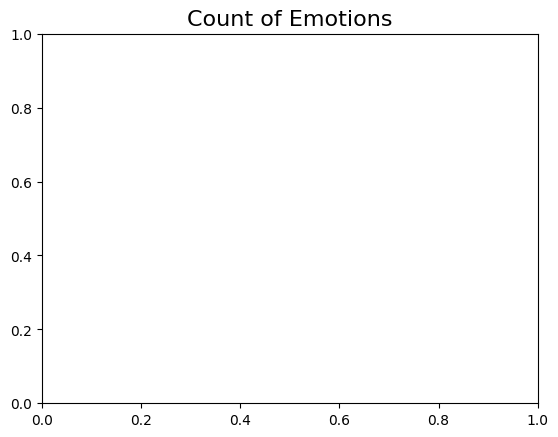

In [36]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()